In [11]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [17]:
df_uk = df[df['job_country'] == 'United Kingdom'].copy()


In [22]:
df_uk['job_posted_month'] = df_uk['job_posted_date'].dt.strftime('%B')

df_uk

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
15,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"['python', 'sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",October
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"['sql', 'python']","{'programming': ['sql', 'python']}",May
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"['sql', 'r', 'python', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",November
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None,December
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"['react', 'docker']","{'libraries': ['react'], 'other': ['docker']}",December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785485,Data Analyst,Data Quality Analyst,Anywhere,via LinkedIn,Full-time,True,United Kingdom,2023-10-04 06:09:44,False,False,United Kingdom,None,NaN,NaN,Viatris,"['sql', 'sql server', 'excel', 'powerpoint']","{'analyst_tools': ['excel', 'powerpoint'], 'da...",October
785513,Data Scientist,Data Scientist,"Glasgow, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:21,False,False,United Kingdom,None,NaN,NaN,ASA Recruitment,"['r', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",January
785522,Data Engineer,Lead Data Engineer,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-19 06:16:45,True,False,United Kingdom,None,NaN,NaN,bionic-services-ltd,"['sql', 'python', 'sql server', 'aws', 'snowfl...","{'analyst_tools': ['ssis'], 'cloud': ['aws', '...",January
785642,Data Engineer,Submission for the position: Data Engineer Sen...,"England, UK",via BAE Systems - Talentify,Full-time,False,United Kingdom,2023-01-02 06:31:23,True,False,United Kingdom,None,NaN,NaN,BAE Systems - UK,"['python', 'vue', 'ssis', 'ssrs', 'qlik', 'con...","{'analyst_tools': ['ssis', 'ssrs', 'qlik'], 'a...",January


In [24]:
df_uk_pivot = df_uk.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [25]:
df_uk_pivot.reset_index(inplace=True)

In [39]:
df_uk_pivot['month_no'] =pd.to_datetime(df_uk_pivot['job_posted_month'], format='%B').dt.month
df_uk_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,46,3,1467,1253,1142,8,169,347,326,20,1
3,February,23,4,1051,1009,859,10,140,301,212,10,2
7,March,47,5,712,789,699,8,91,224,179,19,3
0,April,29,7,561,611,519,8,63,155,123,18,4
8,May,23,1,614,645,486,11,60,227,153,16,5
6,June,14,2,736,862,636,3,102,292,154,4,6
5,July,38,5,892,960,646,13,116,321,184,12,7
1,August,22,7,610,863,657,15,96,247,181,13,8
11,September,111,32,1112,1191,898,51,139,320,221,116,9
10,October,195,57,1175,1348,959,62,168,331,243,126,10


In [40]:
df_uk_pivot.sort_values(by='month_no', inplace=True)
df_uk_pivot.set_index('job_posted_month', inplace=True)
df_uk_pivot.drop(columns='month_no', inplace=True)

In [41]:
df_uk_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


<Axes: xlabel='job_posted_month'>

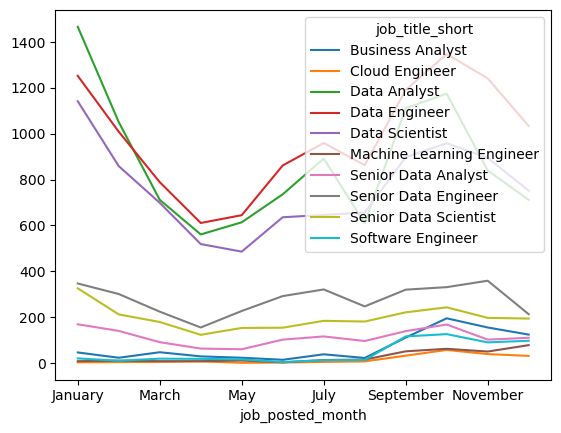

In [43]:
df_uk_pivot.plot(kind='line')

In [50]:
top_3 = df_uk['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()

<function matplotlib.pyplot.show(close=None, block=None)>

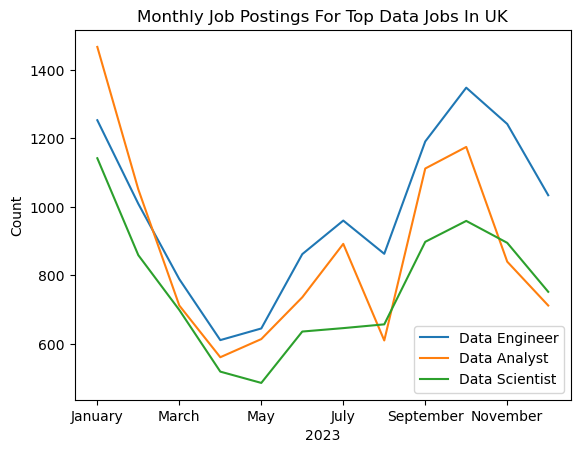

In [53]:
df_uk_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings For Top Data Jobs In UK')
plt.xlabel('2023')
plt.ylabel('Count')
plt.legend()
plt.show